In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

In [15]:
csv_files= ["gt_2011.csv", "gt_2012.csv", "gt_2013.csv", "gt_2014.csv", "gt_2015.csv"]
pp_data_files=[]
for data in csv_files:
    pp_data = pd.read_csv(data)
    pp_data_files.append(pp_data)

In [16]:
all_data= pd.concat(pp_data_files, axis=0)

In [17]:
X = all_data.iloc[:, :-2]
y_CO =all_data.iloc[:, -2]
y_NOx =all_data.iloc[:, -1]

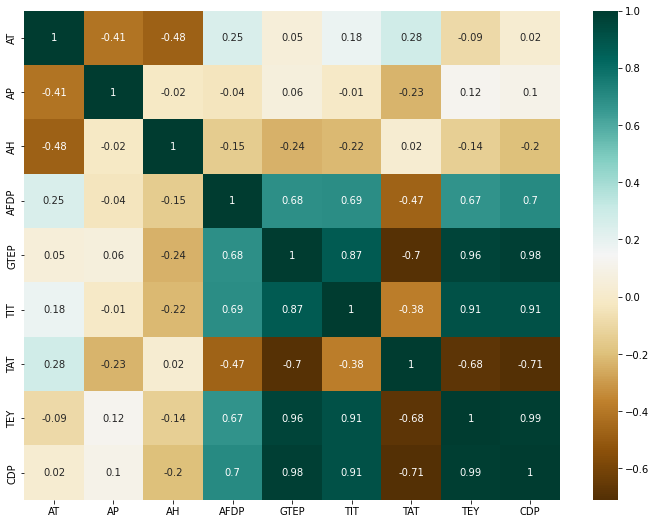

In [18]:
corr= X.corr().round(2)
fig= plt.figure(figsize=(12,9))
sns.heatmap(corr, cmap="BrBG", annot=True)
plt.show()

In [19]:
X_trainval, X_test, yCO_trainval, yCO_test, yNOx_trainval, yNOx_test = train_test_split(X, y_CO, y_NOx, random_state=42)

In [25]:
X_train, X_val, yCO_train, yCO_val, yNOx_train, yNOx_val = train_test_split(X_trainval, yCO_trainval, yNOx_trainval, random_state=42)

In [21]:
Sc = StandardScaler()
X_trainval_scaled=Sc.fit_transform(X_trainval)
X_test_scaled = Sc.transform(X_test)
X_train_scaled = Sc.transform(X_train)
X_val_scaled = Sc.transform(X_val)

In [22]:
best_score_CO=0
for hidden_layer_sizes in [10, [10,10], 100, [100,100]]:
 for alpha in [ 0.001, 0.01, 0.1, 1, 10, 100]:
    MLR_CO = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha)
    MLR_CO.fit(X_train_scaled, yCO_train)
    score_val_CO= MLR_CO.score(X_val_scaled, yCO_val)
    if score_val_CO > best_score_CO:
        best_score_CO= score_val_CO
        best_param_CO ={'hidden_layer_sizes': hidden_layer_sizes, 'alpha':alpha}
        MLR_CO=MLPRegressor(**best_param_CO)
        MLR_CO.fit(X_trainval_scaled, yCO_trainval)
        Training_score_CO= MLR_CO.score(X_trainval_scaled, yCO_trainval)
        Test_score_CO =MLR_CO.score(X_test_scaled,yCO_test)
print("Best score on validation set: {:.2f}". format(best_score_CO))
print("Best parameters:",best_param_CO)
print("Training set score: {:.2f}". format(Training_score_CO))
print("Test set score: {:.2f}". format(Test_score_CO))
print("KNNR MAE on trainval set for CO is: ",mean_absolute_error(yCO_trainval, MLR_CO.predict(X_trainval_scaled)))
print("KNNR MAE on test set for CO is: ",mean_absolute_error(yCO_test, MLR_CO.predict(X_test_scaled)))
print()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Best score on validation set: 0.77
Best parameters: {'hidden_layer_sizes': [100, 100], 'alpha': 0.1}
Training set score: 0.83
Test set score: 0.78
KNNR MAE on trainval set for CO is:  0.8449748275517042
KNNR MAE on test set for CO is:  0.8450264930180185



In [26]:
best_score_NOx = 0
for hidden_layer_sizes in [10, [10,10], 100, [100,100]]:
 for alpha in [ 0.001, 0.01, 0.1, 1, 10, 100]:
    MLR_NOx = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha)
    MLR_NOx.fit(X_train_scaled, yNOx_train)
    score_val_NOx= MLR_NOx.score(X_val_scaled, yNOx_val)
    if score_val_NOx > best_score_NOx:
        best_score_NOx = score_val_NOx
        best_param_NOx ={'hidden_layer_sizes': hidden_layer_sizes, 'alpha':alpha}
        MLR_NOx =MLPRegressor(**best_param_NOx)
        MLR_NOx.fit(X_trainval_scaled, yNOx_trainval)
        Training_score_NOx = MLR_NOx.score(X_trainval_scaled, yNOx_trainval)
        Test_score_NOx = MLR_NOx.score(X_test_scaled,yNOx_test)
print("Best score on validation set: {:.2f}". format(best_score_NOx))
print("Best parameters:",best_param_NOx)
print("Training set score: {:.2f}". format(Training_score_NOx))
print("Test set score: {:.2f}". format(Test_score_NOx))
print("MLR MAE on trainval set for NOx is: ",mean_absolute_error(yNOx_trainval, MLR_NOx.predict(X_trainval_scaled)))
print("MLR MAE on test set for NOx is: ",mean_absolute_error(yNOx_test, MLR_NOx.predict(X_test_scaled)))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iteration